<a href="https://colab.research.google.com/github/kareembadrsaber/electropi.ai_projects/blob/master/Market_Segmentation_with_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

### **Load the dataset**

In [20]:
df=pd.read_csv('/bank-additional-full.csv')

In [21]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


### **Load and display Bank Additional Full Dataset**

In [72]:
df = pd.read_csv("/bank-additional-full.csv", delimiter=";")
column_names = [
    "age", "job", "marital", "education", "default",
    "housing", "loan", "contact", "month", "day_of_week",
    "duration", "campaign", "pdays", "previous", "poutcome",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx",
    "euribor3m", "nr.employed", "y"
]
df.columns = column_names
print(df)


       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [25]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [26]:
df.duplicated().sum()

12

In [27]:
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [28]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [29]:
df['education'].fillna(df['education'].mode()[0], inplace=True)

In [30]:
df['poutcome'].fillna('unknown', inplace=True)

In [31]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

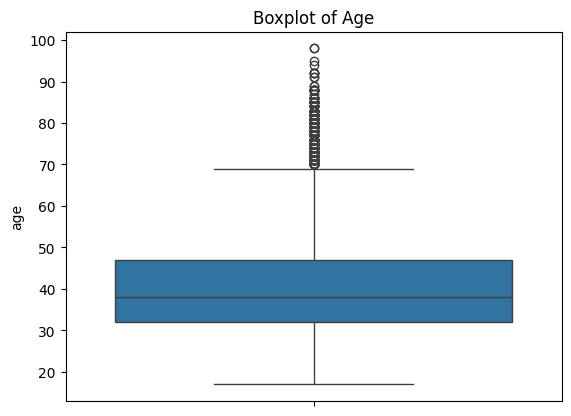

In [33]:
sns.boxplot(y=df['age'])
plt.title('Boxplot of Age')
plt.show()

<ipython-input-35-694c989b91a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='job', order=df['job'].value_counts().index, palette='Set2')


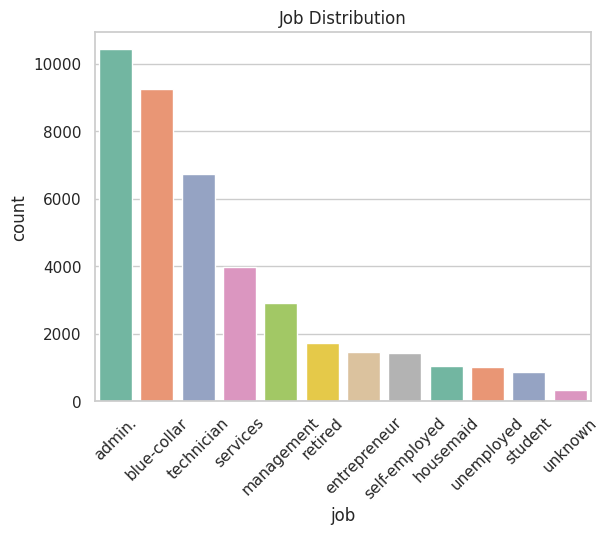

In [35]:
sns.set(style="whitegrid")
sns.countplot(data=df, x='job', order=df['job'].value_counts().index, palette='Set2')
plt.title('Job Distribution')
plt.xticks(rotation=45)
plt.show()

<ipython-input-42-d89ea84725d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='marital', palette='Dark2')


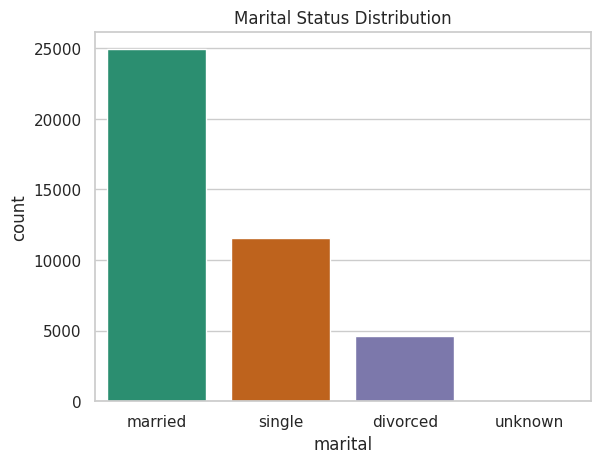

In [42]:
sns.set(style="whitegrid")
sns.countplot(data=df, x='marital', palette='Dark2')
plt.title('Marital Status Distribution')
plt.show()

### **Example: Histogram of the 'age' column**


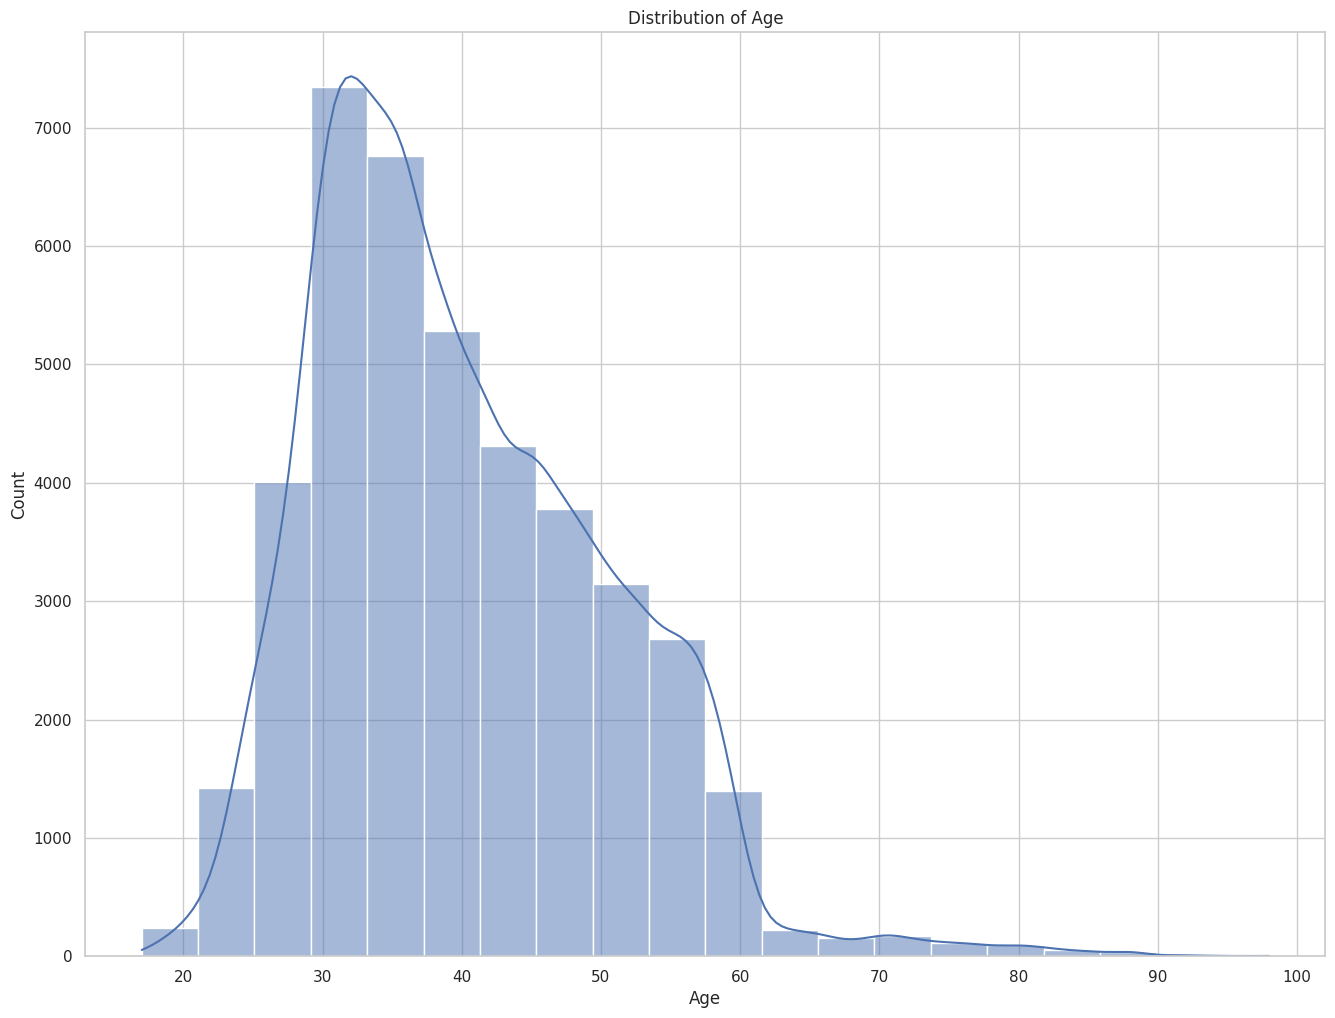

In [43]:
plt.figure(figsize=(16, 12))
sns.histplot(df['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

<ipython-input-45-22b6fcda1873>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='education', order=df['education'].value_counts().index, palette='Dark2')


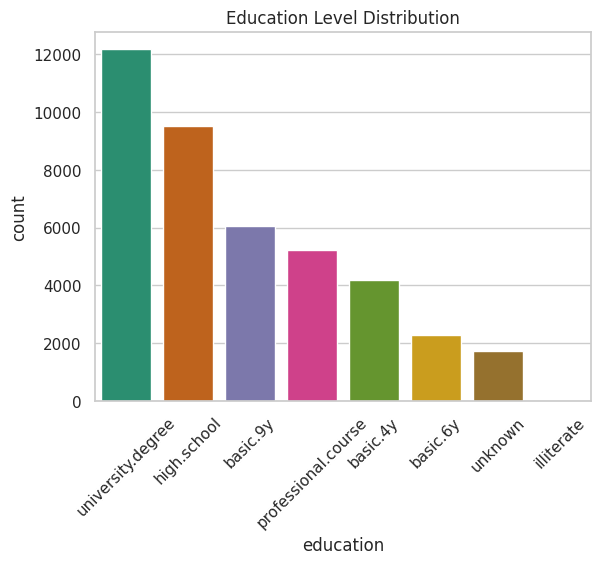

In [45]:
sns.set(style="whitegrid")
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, palette='Dark2')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

<ipython-input-47-b73e644c365a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='contact', palette='Dark2')


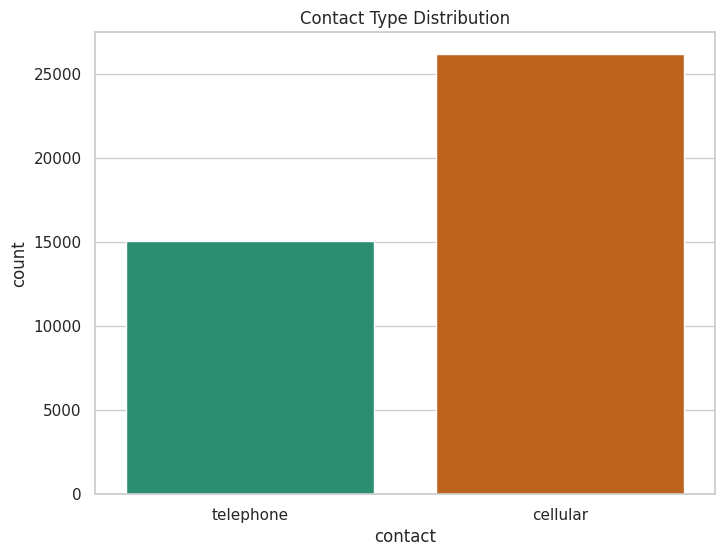

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='contact', palette='Dark2')
plt.title('Contact Type Distribution')
plt.show()

In [48]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


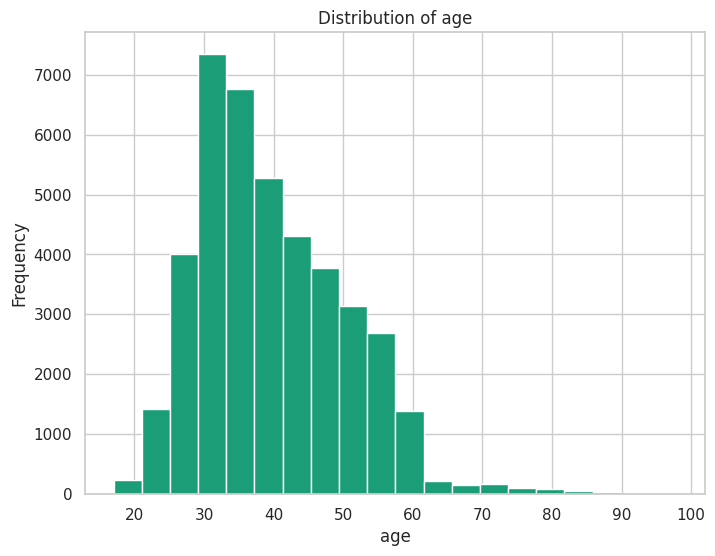

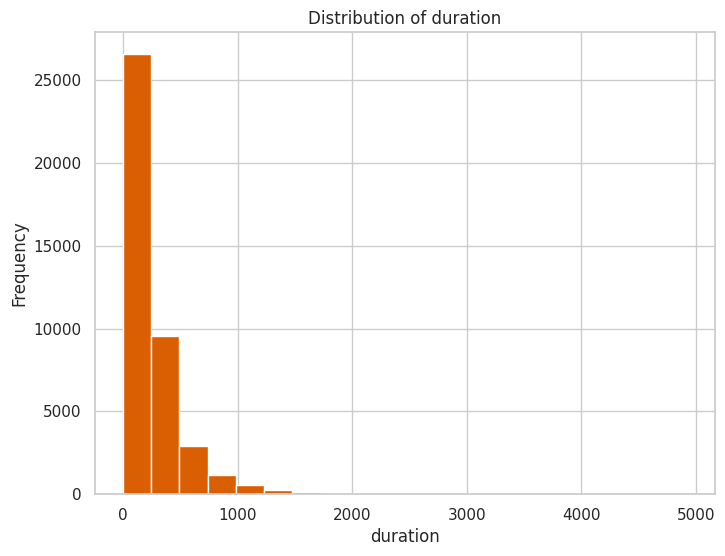

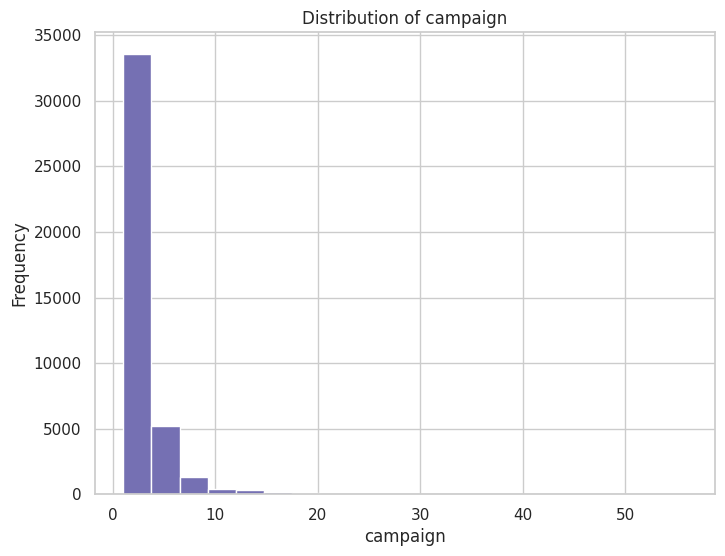

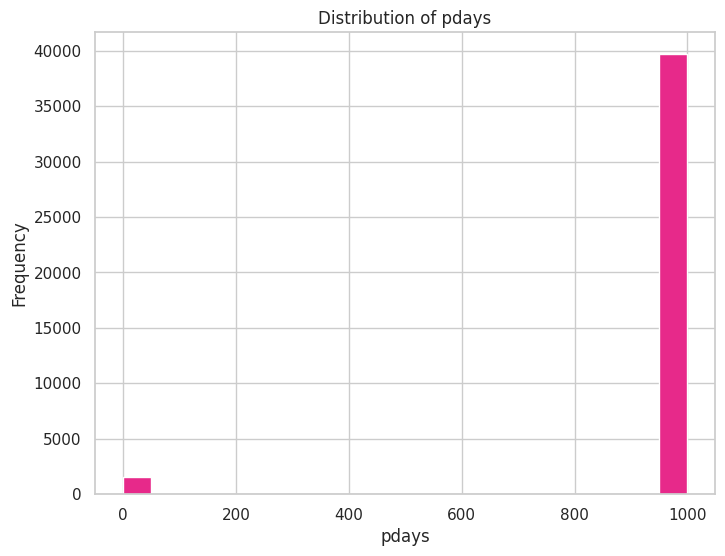

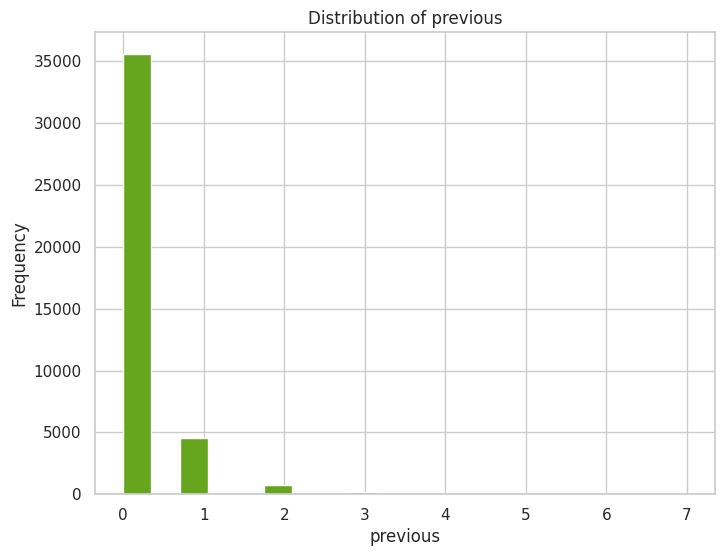

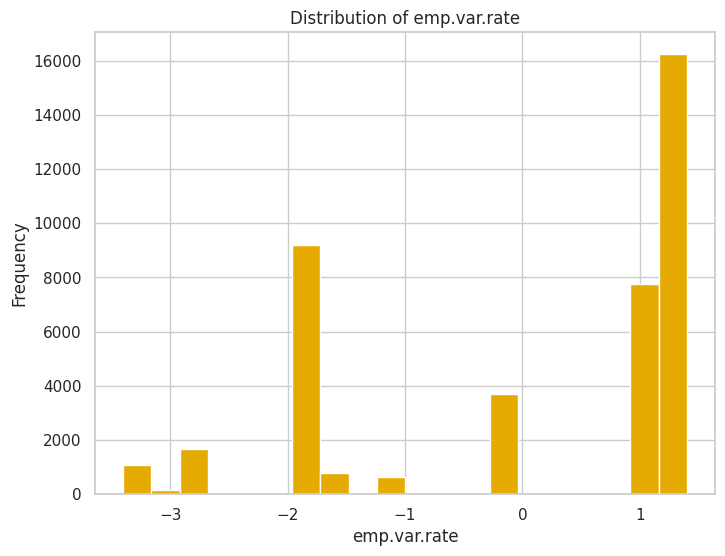

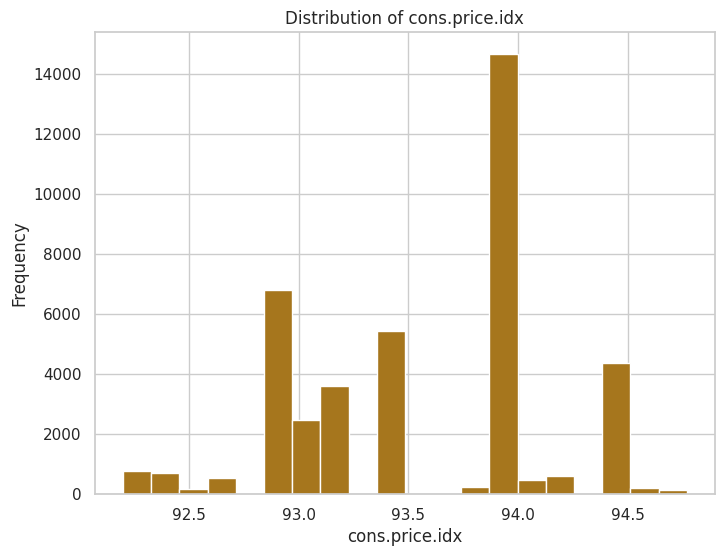

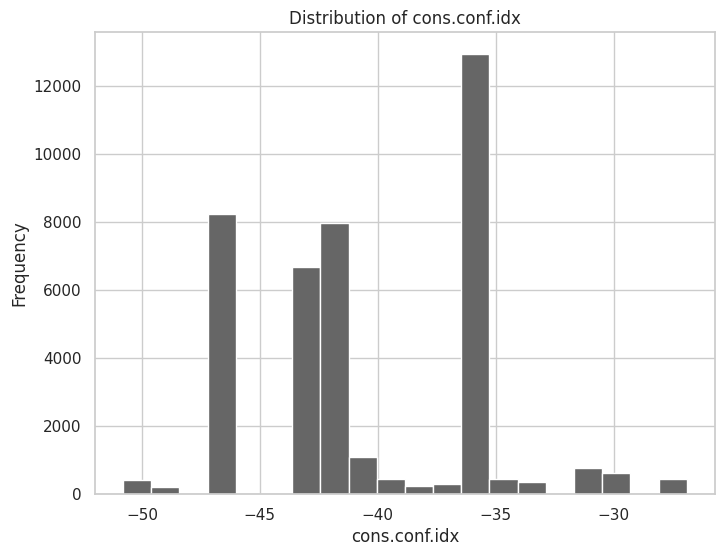

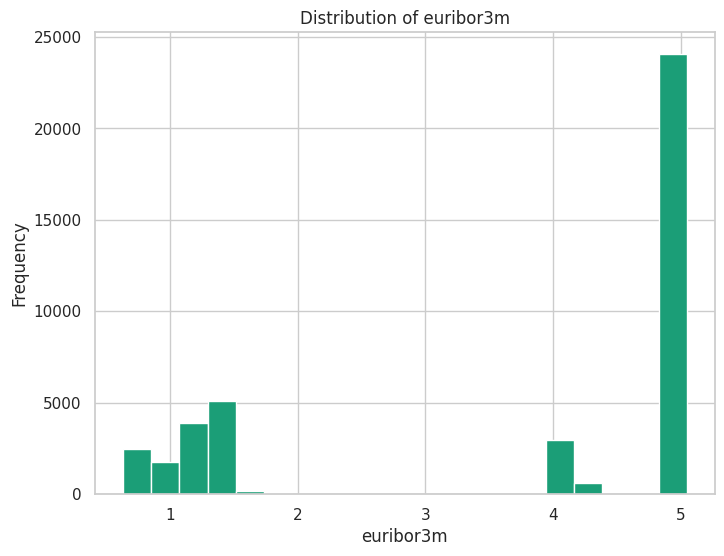

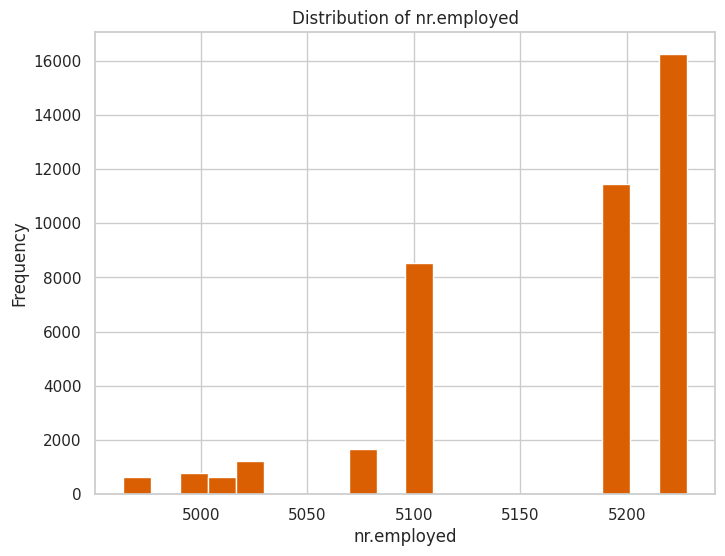

In [50]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
color_palette = sns.color_palette("Dark2", n_colors=len(numerical_cols))

for col, color in zip(numerical_cols, color_palette):
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=20, color=color)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


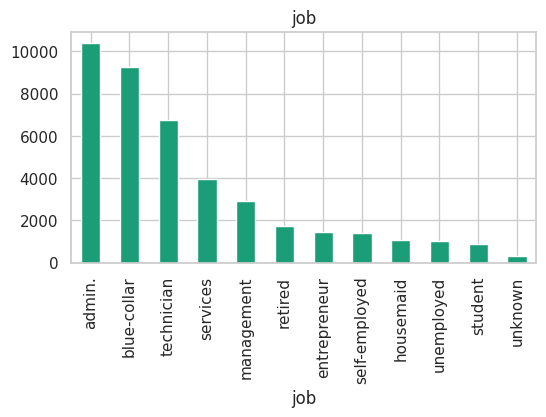

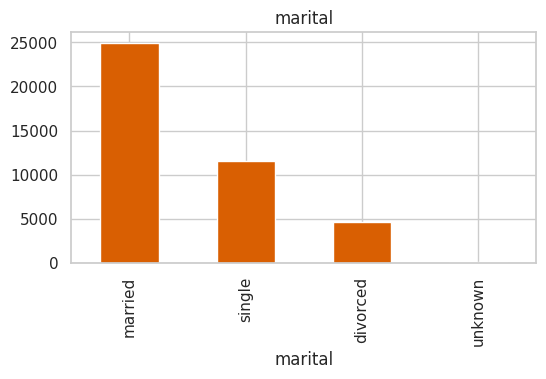

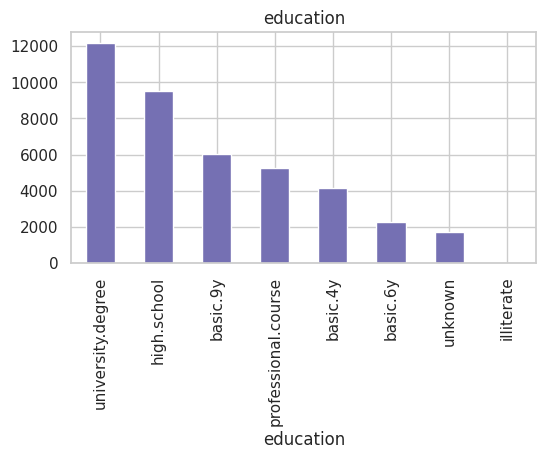

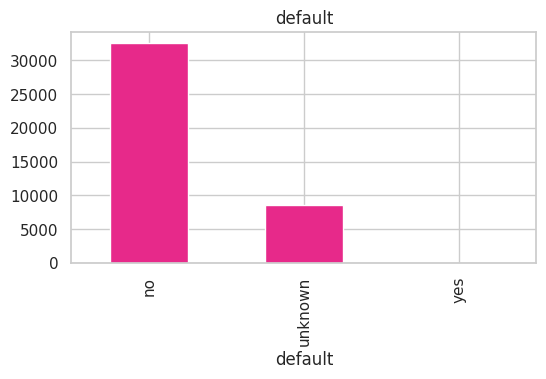

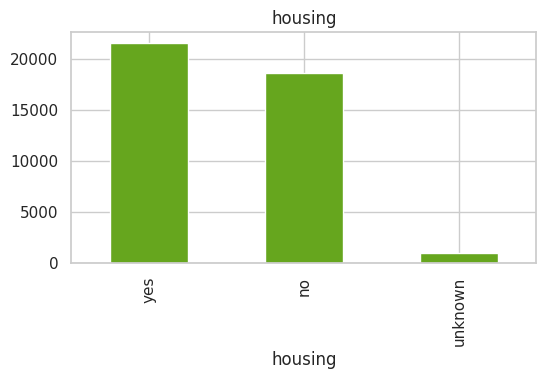

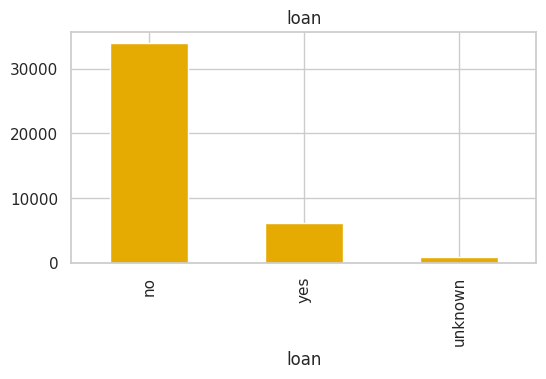

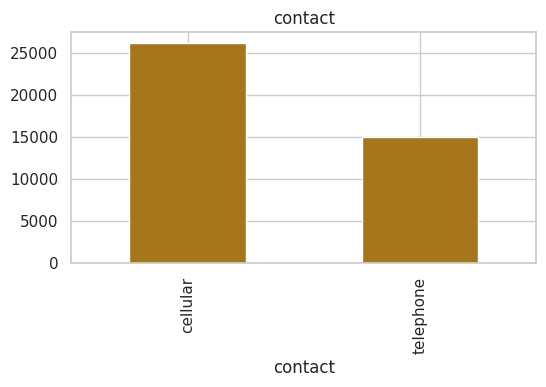

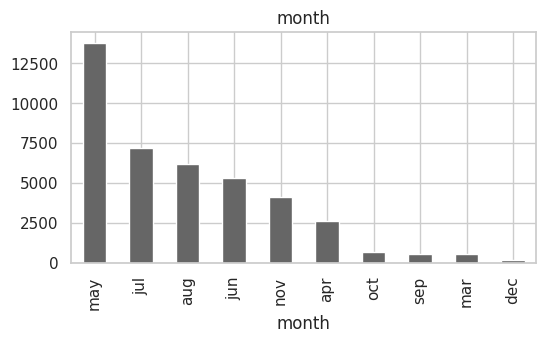

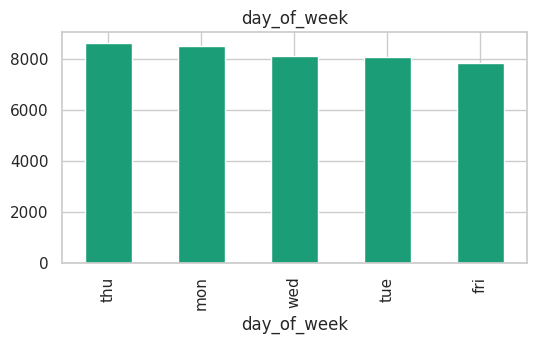

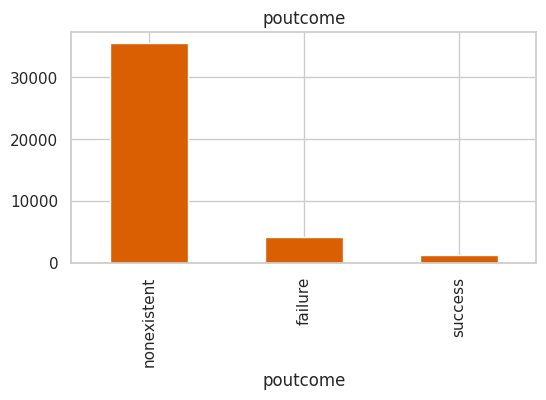

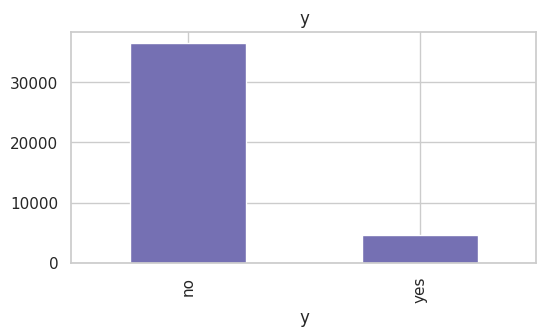

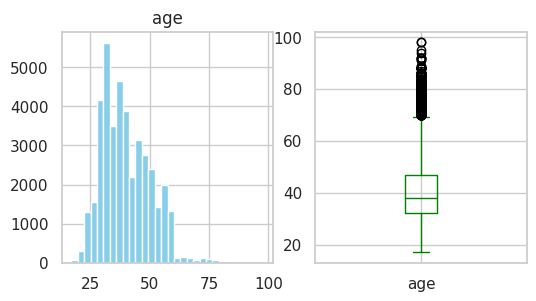

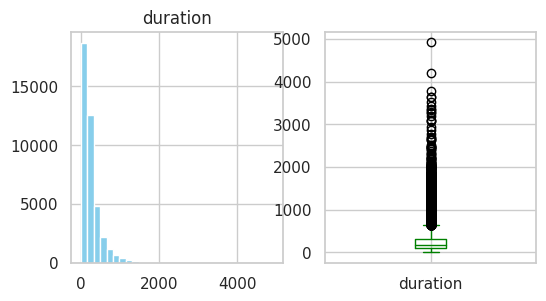

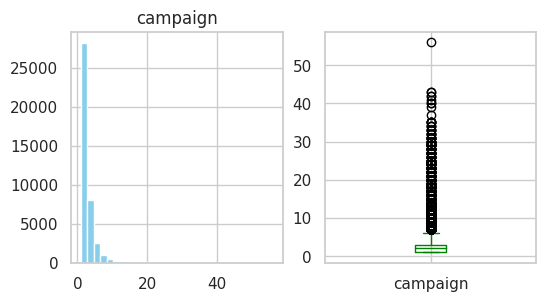

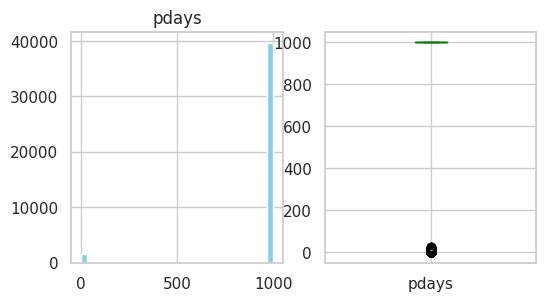

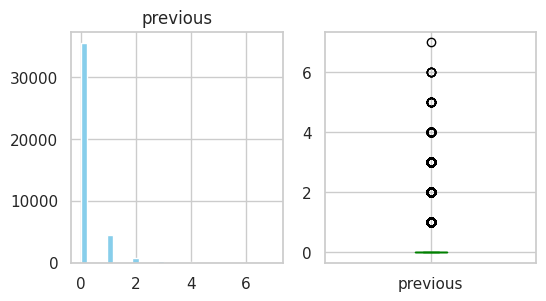

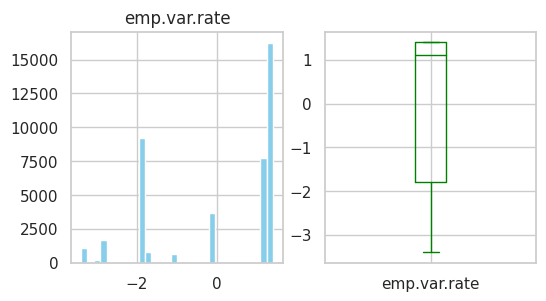

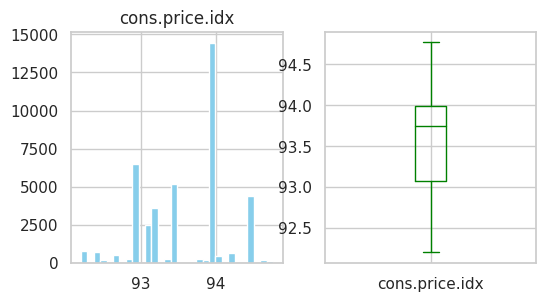

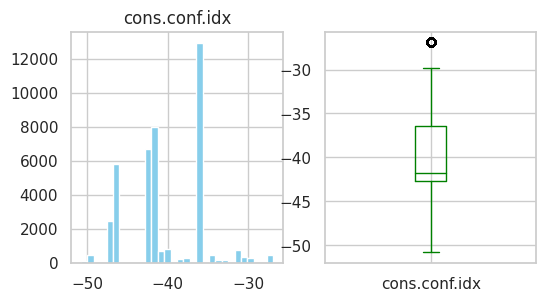

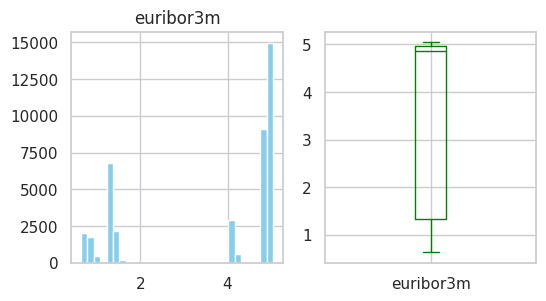

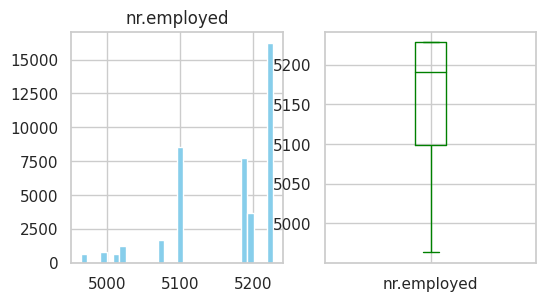

In [52]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

# Define color palette
palette = sns.color_palette("Dark2", n_colors=len(categorical_cols))

# Plot histograms for categorical columns
for col, color in zip(categorical_cols, palette):
    plt.figure(figsize=(6, 3))
    df[col].value_counts().plot(kind='bar', color=color)
    plt.title(col)
    plt.show()

# Plot histograms + box plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    df[col].hist(bins=30, color='skyblue')  # You can choose any color you prefer
    plt.title(col)

    # Box plot
    plt.subplot(1, 2, 2)
    df[col].plot(kind='box', color='green')  # You can choose any color you prefer

    plt.show()

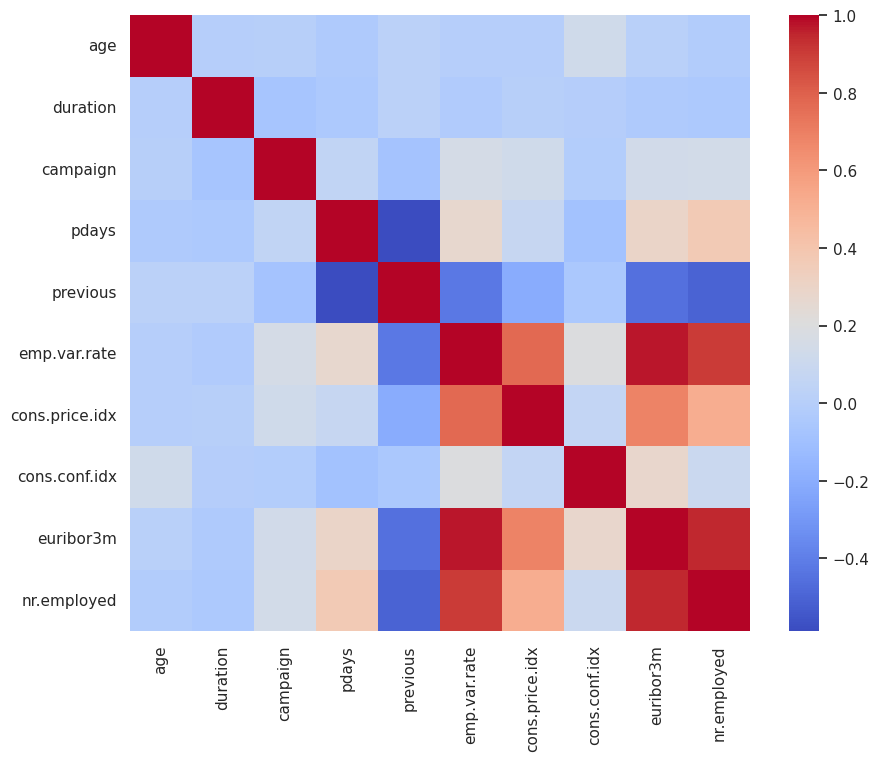

In [54]:
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64']).columns
numeric_df = df.drop(columns=non_numeric_cols)
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm')
plt.show()


In [55]:
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame and 'y' is the target column

# Selecting features and target
X = df[['euribor3m', 'nr.employed', 'emp.var.rate']]
y = df['y'].map({'yes': 1, 'no': 0})  # Converting 'yes' and 'no' to binary

# Training the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extracting feature importances
feature_importances = rf.feature_importances_

# Mapping features to their importance
features_dict = dict(zip(X.columns, feature_importances))

# Sorting and displaying the features by importance
sorted_features = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)

print(sorted_features)

[('euribor3m', 0.5394622074007565), ('nr.employed', 0.31405106535032856), ('emp.var.rate', 0.14648672724891493)]


In [56]:
df.drop(['emp.var.rate'],axis=1,inplace=True)
df.drop(['nr.employed'],axis=1,inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [58]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [59]:
# List of non-numeric columns excluding 'education' and target
non_numeric_cols.remove('education')
non_numeric_cols.remove('y')

# One-Hot Encoding for all non-numeric columns except 'education'
df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)  # drop_first to avoid dummy variable trap

# Label Encoding for 'education'
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df.head()

,age,education,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,261,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
1,57,3,149,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
2,37,3,226,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
3,40,1,151,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
4,56,3,307,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False


In [60]:
from sklearn.model_selection import train_test_split
X=df.drop('y',axis=1)
y=df['y']
y = (y == 'yes').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [61]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [63]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [70]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Define a function to create the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_resampled.shape[1], activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define k-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialize lists to store evaluation results
train_acc_scores = []
test_acc_scores = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kf.split(X_train_resampled), 1):
    X_train_fold, X_val_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_val_fold = y_train_resampled[train_index], y_train_resampled[test_index]

    # Create and compile the model
    model = create_model()

    # Train the model with early stopping
    history=model.fit(
        X_train_fold, y_train_fold,
        epochs=20,  # You can adjust the maximum number of epochs
        batch_size=32,
        verbose=1,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping]  # Add the early stopping callback
    )

    # Evaluate on training data
    train_acc = model.evaluate(X_train_fold, y_train_fold, verbose=0)[1]
    train_acc_scores.append(train_acc)

    # Evaluate on validation data
    val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
    test_acc_scores.append(val_acc)

    print(f"Fold {fold} completed.")


# Calculate and print the average accuracy scores
avg_train_acc = np.mean(train_acc_scores)
avg_test_acc = np.mean(test_acc_scores)
print(f'Average Training Accuracy: {avg_train_acc}')
print(f'Average Validation Accuracy: {avg_test_acc}')

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

Epoch 1/20
1066/1066 [==============================] - 7s 4ms/step - loss: 0.4583 - accuracy: 0.7951 - val_loss: 0.2926 - val_accuracy: 0.8926
Epoch 2/20
1066/1066 [==============================] - 5s 4ms/step - loss: 0.3182 - accuracy: 0.8786 - val_loss: 0.2775 - val_accuracy: 0.8970
Epoch 3/20
1066/1066 [==============================] - 4s 4ms/step - loss: 0.2946 - accuracy: 0.8882 - val_loss: 0.2661 - val_accuracy: 0.9017
Epoch 4/20
1066/1066 [==============================] - 4s 3ms/step - loss: 0.2810 - accuracy: 0.8938 - val_loss: 0.2523 - val_accuracy: 0.9036
Epoch 5/20
1066/1066 [==============================] - 5s 4ms/step - loss: 0.2713 - accuracy: 0.8971 - val_loss: 0.2466 - val_accuracy: 0.9080
Epoch 6/20
1066/1066 [==============================] - 4s 4ms/step - loss: 0.2626 - accuracy: 0.9017 - val_loss: 0.2415 - val_accuracy: 0.9102
Epoch 7/20
1066/1066 [==============================] - 4s 4ms/step - loss: 0.2542 - accuracy: 0.9043 - val_loss: 0.2376 - val_accuracy: